<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 1
Add sym link to downloaded data:

`ln -s creditcard_sampledata.csv creditcard_data.csv`

In [10]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("creditcard_data.csv", index_col=0)

# Explore the features available in your dataframe
print(df.info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / sum(occ))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 31 columns):
Time      8000 non-null int64
V1        8000 non-null float64
V2        8000 non-null float64
V3        8000 non-null float64
V4        8000 non-null float64
V5        8000 non-null float64
V6        8000 non-null float64
V7        8000 non-null float64
V8        8000 non-null float64
V9        8000 non-null float64
V10       8000 non-null float64
V11       8000 non-null float64
V12       8000 non-null float64
V13       8000 non-null float64
V14       8000 non-null float64
V15       8000 non-null float64
V16       8000 non-null float64
V17       8000 non-null float64
V18       8000 non-null float64
V19       8000 non-null float64
V20       8000 non-null float64
V21       8000 non-null float64
V22       8000 non-null float64
V23       8000 non-null float64
V24       8000 non-null float64
V25       8000 non-null float64
V26       8000 non-null float64
V27       8000 non-null float64

In [15]:
import matplotlib.pyplot as plt

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float)
    return X,y

df = df.drop('Time', axis='columns')

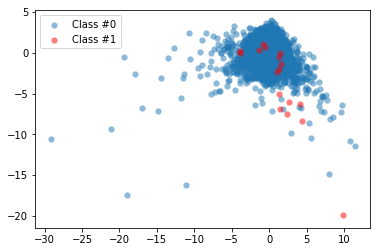

In [16]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

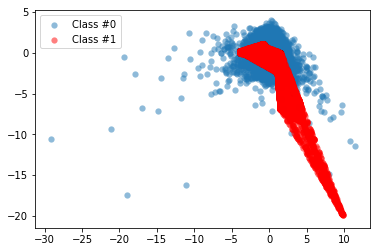

In [19]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

In [20]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

0.0    7983
1.0      17
dtype: int64
1.0    7983
0.0    7983
dtype: int64


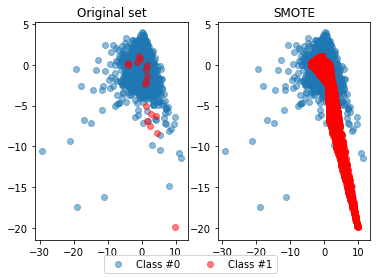

In [21]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

In [27]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              7949  34
1                13   4


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

   micro avg       1.00      1.00      1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

   micro avg       1.00      1.00      1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [40]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.50      0.60      0.55        10

   micro avg       1.00      1.00      1.00      2400
   macro avg       0.75      0.80      0.77      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2384    6]
 [   4    6]]


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = RandomForestClassifier()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

In [42]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.20      0.33        10

   micro avg       1.00      1.00      1.00      2400
   macro avg       1.00      0.60      0.67      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   8    2]]
